In [1]:
#imstall missingno
!pip install missingno

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
import missingno as msno 
import warnings
warnings.filterwarnings("ignore")

# Data Ingestion

In [3]:
df = pd.read_csv('vehicles.csv')
df.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0        0.0        0.0      19      0.0        0   
1  27.046364         0.0        0.0        0.0       9      0.0        0   
2  11.018889         0.0        0.0        0.0      23      0.0        0   
3  27.046364         0.0        0.0        0.0      10      0.0        0   
4  15.658421         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
3  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
4  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

   phevCity  phevHwy  phevComb  
0         0        0         0  
1         0        0         0  
2         0        0         0  
3         0        0         0  
4         0        0         0  

[5 rows x 83 columns]

In [4]:
emission = pd.read_csv('emissions.csv')
emission.head()

efid     id  salesArea  score  scoreAlt  smartwayScore standard  \
0  4HNXV03.2MJE  19332          3    1.0      -1.0             -1       B9   
1  4HNXV03.2MJE  19332          7    1.0      -1.0             -1       L1   
2  4HNXV03.2MJE  19333          3    1.0      -1.0             -1       B9   
3  4HNXV03.2MJE  19333          7    1.0      -1.0             -1       L1   
4  4ADXV01.8346  19334          3    1.0      -1.0             -1       B9   

  stdText  
0   BIN 9  
1     LEV  
2   BIN 9  
3     LEV  
4   BIN 9

# Data Preparation

In [5]:
emission.shape

(47527, 8)

In [6]:
df.shape

(45992, 83)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45992 entries, 0 to 45991
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        45992 non-null  float64
 1   barrelsA08       45992 non-null  float64
 2   charge120        45992 non-null  float64
 3   charge240        45992 non-null  float64
 4   city08           45992 non-null  int64  
 5   city08U          45992 non-null  float64
 6   cityA08          45992 non-null  int64  
 7   cityA08U         45992 non-null  float64
 8   cityCD           45992 non-null  float64
 9   cityE            45992 non-null  float64
 10  cityUF           45992 non-null  float64
 11  co2              45992 non-null  int64  
 12  co2A             45992 non-null  int64  
 13  co2TailpipeAGpm  45992 non-null  float64
 14  co2TailpipeGpm   45992 non-null  float64
 15  comb08           45992 non-null  int64  
 16  comb08U          45992 non-null  float64
 17  combA08     

In [8]:
emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47527 entries, 0 to 47526
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   efid           47527 non-null  object 
 1   id             47527 non-null  int64  
 2   salesArea      47527 non-null  int64  
 3   score          47527 non-null  float64
 4   scoreAlt       47527 non-null  float64
 5   smartwayScore  47527 non-null  int64  
 6   standard       47527 non-null  object 
 7   stdText        47513 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.9+ MB


In [9]:
# merging emission with vehicle file using the column they have in common, id
data = df.merge(emission, on=['id'])
data.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  16.528333         0.0        0.0        0.0      16      0.0        0   
1  16.528333         0.0        0.0        0.0      16      0.0        0   
2  16.528333         0.0        0.0        0.0      16      0.0        0   
3  16.528333         0.0        0.0        0.0      16      0.0        0   
4  14.167143         0.0        0.0        0.0      18      0.0        0   

   cityA08U  cityCD  cityE  ...  phevCity  phevHwy  phevComb          efid  \
0       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
1       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
2       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
3       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
4       0.0     0.0    0.0  ...         0        0         0  4ADXV01.8346   

   salesArea  score  scoreAlt  smartwayScore  standard  stdText  
0          3    1.0      -1.0             -1        B9    BIN 9  
1          7    1.0      -1.0             -1        L1      LEV  
2          3    1.0      -1.0             -1        B9    BIN 9  
3          7    1.0      -1.0             -1        L1      LEV  
4          3    1.0      -1.0             -1        B9    BIN 9  

[5 rows x 90 columns]

In [10]:
data.shape

(47393, 90)

In [11]:
# checking for duplicates
data.duplicated().value_counts()

False    47393
dtype: int64

**Missing value treatment**

<AxesSubplot:>

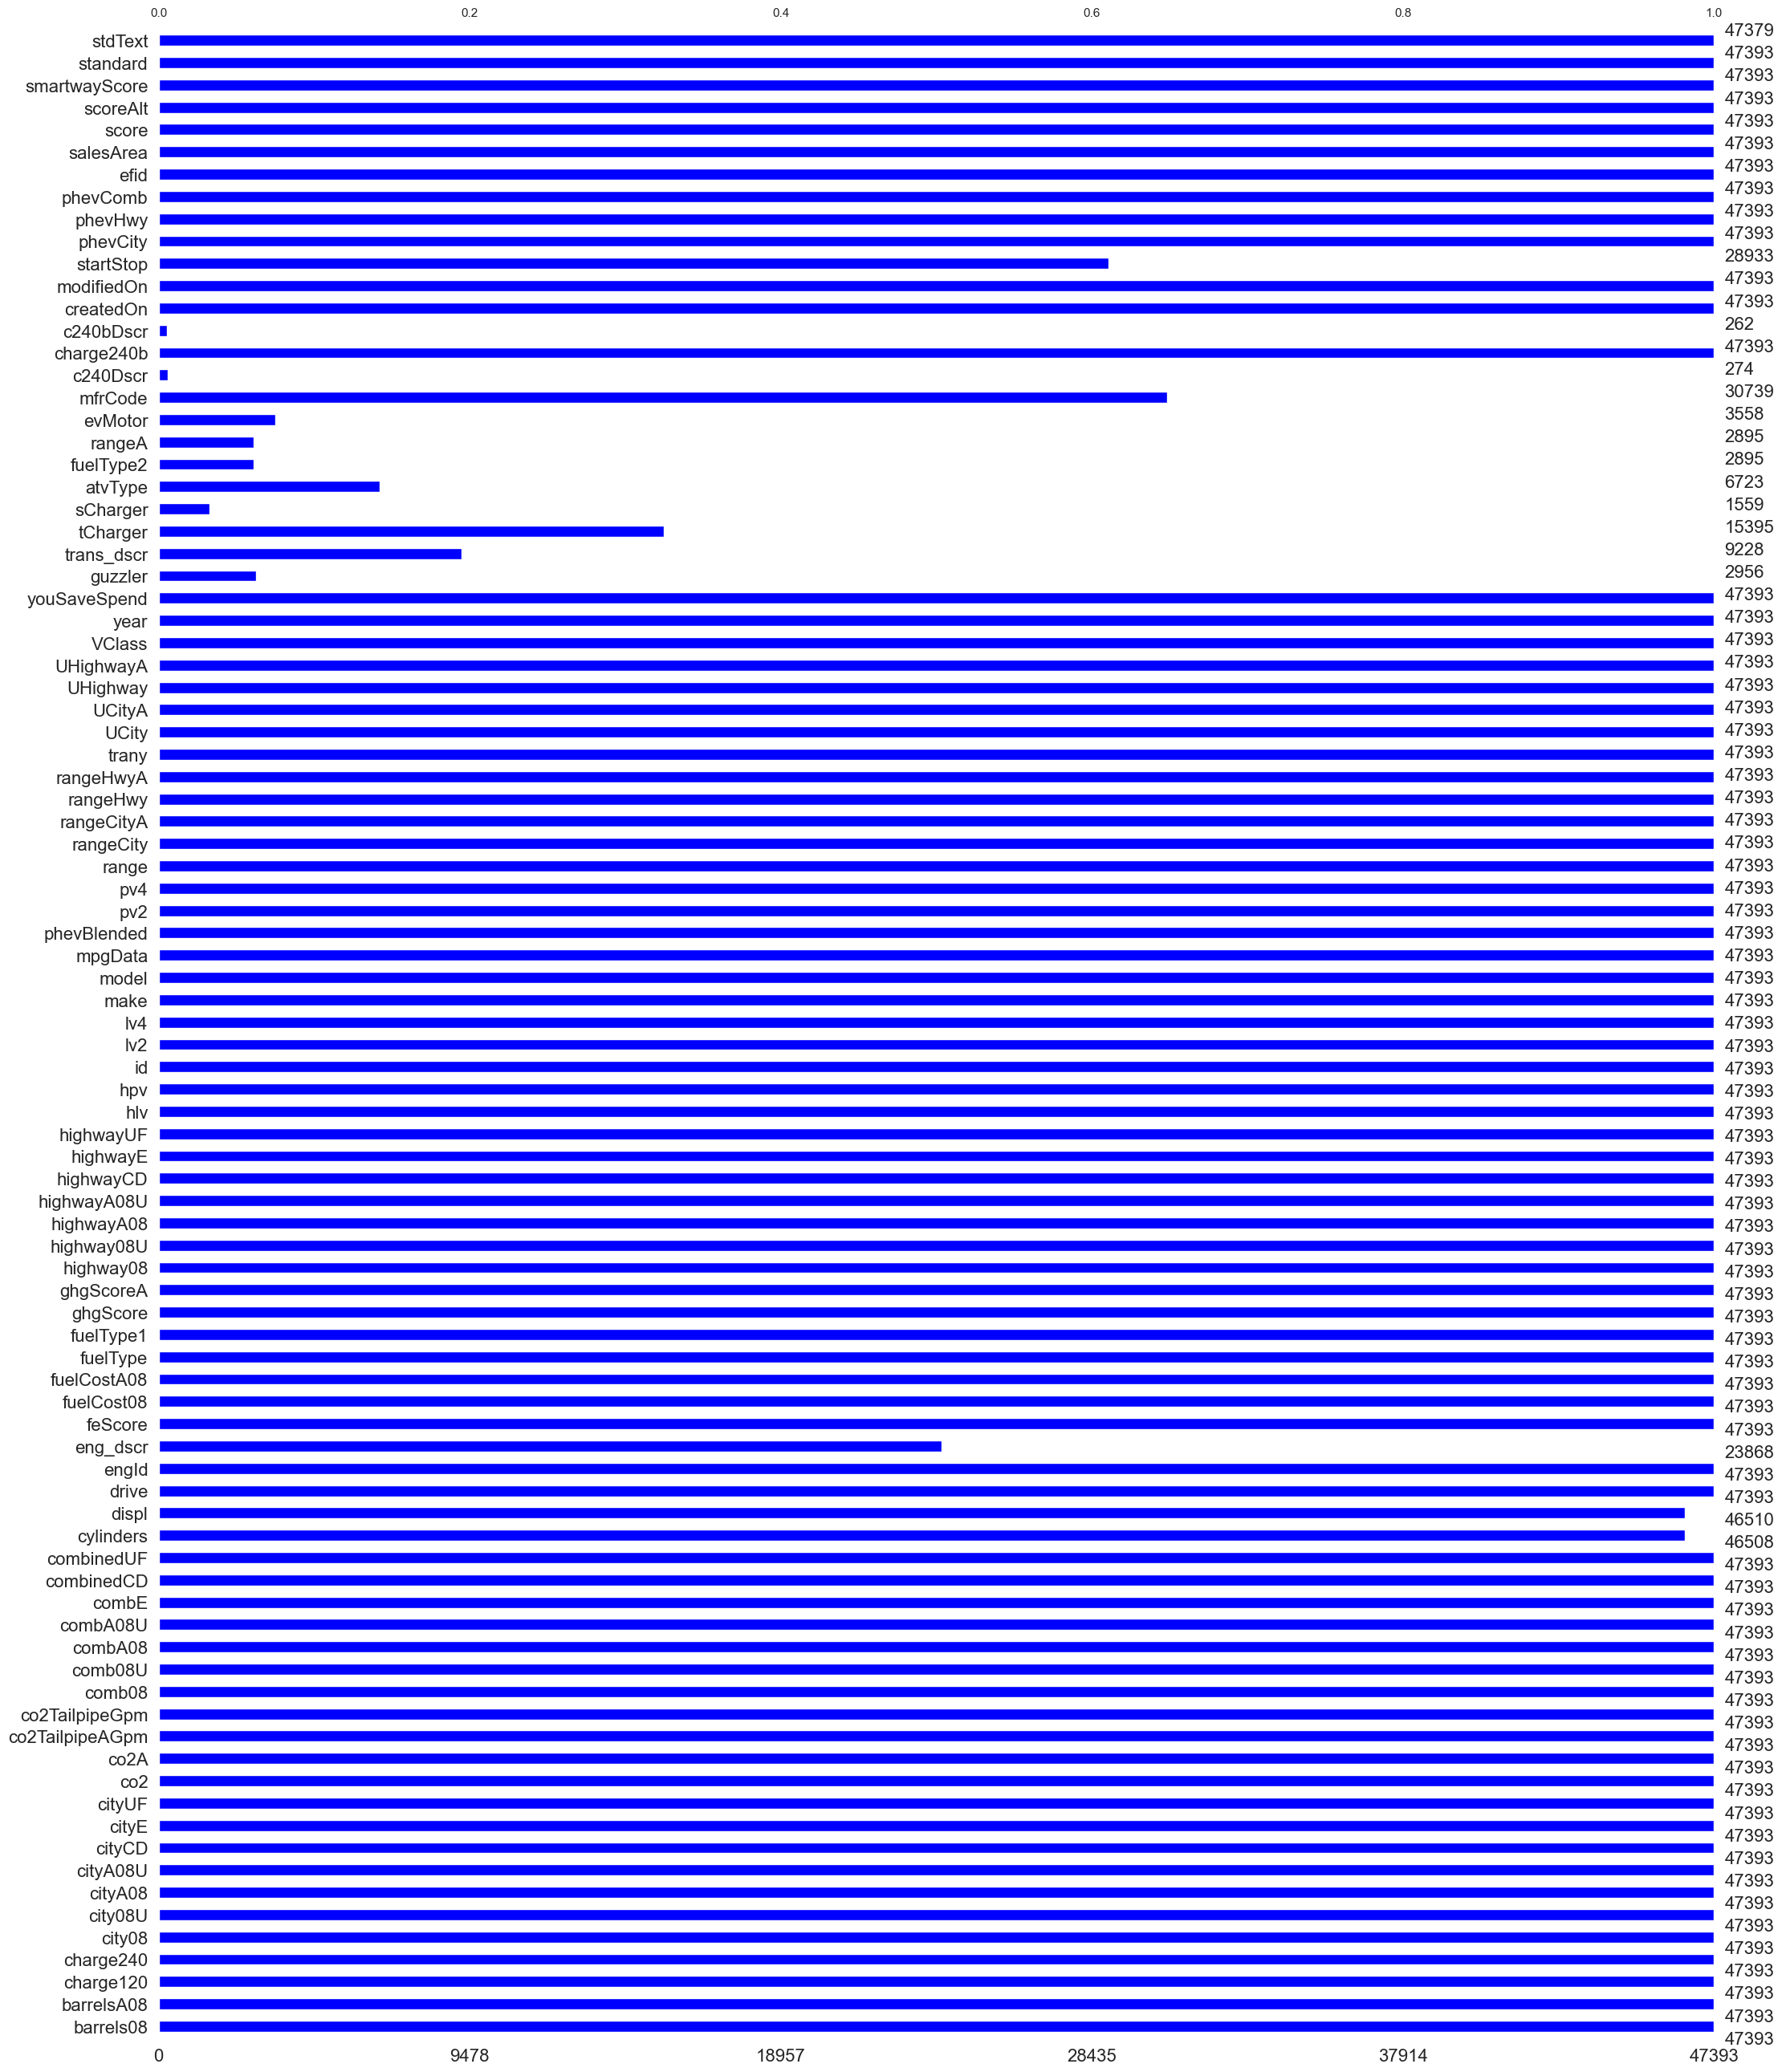

In [12]:
# Visualize the missing values using msno bar
sns.set(style = 'ticks')
msno.bar(data, color = "blue")
# This plot helps us to visualize the amount of missing data in every attributes for the train data set

In [13]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [14]:
# Dropping columns with more than 20% missing values 
missing_data = data.isnull().sum()/len(data)
data = data.drop(columns=missing_data[missing_data>0.2].index)
data.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  16.528333         0.0        0.0        0.0      16      0.0        0   
1  16.528333         0.0        0.0        0.0      16      0.0        0   
2  16.528333         0.0        0.0        0.0      16      0.0        0   
3  16.528333         0.0        0.0        0.0      16      0.0        0   
4  14.167143         0.0        0.0        0.0      18      0.0        0   

   cityA08U  cityCD  cityE  ...  phevCity  phevHwy  phevComb          efid  \
0       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
1       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
2       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
3       0.0     0.0    0.0  ...         0        0         0  4HNXV03.2MJE   
4       0.0     0.0    0.0  ...         0        0         0  4ADXV01.8346   

   salesArea  score  scoreAlt  smartwayScore  standard  stdText  
0          3    1.0      -1.0             -1        B9    BIN 9  
1          7    1.0      -1.0             -1        L1      LEV  
2          3    1.0      -1.0             -1        B9    BIN 9  
3          7    1.0      -1.0             -1        L1      LEV  
4          3    1.0      -1.0             -1        B9    BIN 9  

[5 rows x 77 columns]

In [15]:
data.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08',
       'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA', 'highway08',
       'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE',
       'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make', 'model',
       'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'charge240b',
       'createdOn', 'modifiedOn', 'phevCity', 'phevHwy', 'phevComb', 'efid',
       'salesArea', 'score', 'scoreAlt', 'smartwayScore', 'standard',
       'stdText'],
      dtype='object')

**Feature Selection**

**Target and Predictor variables explanation:** 

 
cylinders - engine cylinders

displ - engine displacement in liters

drive - drive axle type

engId - EPA model type index

feScore - EPA Fuel Economy Score

fuelCost08 - annual fuel cost

fuelType - fuel type with fuelType1 and fuelType2 (if applicable)

trany - transmission

VClass - EPA vehicle size class

make - manufacturer

model - model name

This project involves prediction of fuel economy and emission, and from the documentation of this data set (https://www.fueleconomy.gov/feg/ws/index.shtml#fuelType1), there are two fuel types for each prediction, fuel type1 and fuel type2, however fuel type2 was dropped because it has over 93% missing values. So I'll be working with features related with fuel type 1 and I woulde be using the fuel type input variale because it is a combination of both fuel type one and two.

There are two co2 as target features, co2 and co2TailpipeGpm, from the documentation, they have same meaning but they actually have different data inputs, so I would view them individually and use just one.

In [16]:
data['co2TailpipeGpm'].value_counts()

423.190476    2011
444.350000    1902
467.736842    1770
493.722222    1611
403.954545    1517
              ... 
707.000000       1
391.538462       1
682.000000       1
565.555556       1
130.000000       1
Name: co2TailpipeGpm, Length: 657, dtype: int64

In [17]:
data['co2'].value_counts()

-1      18849
 0        885
 407      187
 415      180
 387      178
        ...  
 161        2
 219        2
 130        1
 682        1
 707        1
Name: co2, Length: 602, dtype: int64

It can be seen that co2 has -1 data inputs. 

The amount of carbon dioxide that is emitted into the atmosphere by a vehicle's combustion of fossil fuels is measured by its CO2 emissions, which technically cannot be negative.

However, a vehicle could have "negative emissions" in the sense that it uses carbon capture and storage (CCS) technology to lower the quantity of CO2 in the atmosphere.

There aren't any vehicles on the market right now that use carbon capture and storage (CCS) technology to achieve negative emissions.

There for I will not be using this particular co2 feature in this project, I'd use the co2tailpipe as my target co2.

In [18]:
targets = data[['fuelCost08','co2TailpipeGpm']]
targets

fuelCost08  co2TailpipeGpm
0            3500      493.722222
1            3500      493.722222
2            3500      493.722222
3            3500      493.722222
4            3000      423.190476
...           ...             ...
47388        1100        0.000000
47389        1000        0.000000
47390        1000        0.000000
47391        1050        0.000000
47392        1050        0.000000

[47393 rows x 2 columns]

# FOCUSING ON TARGET CO2TailPipe

In [19]:
# Selecting relevant features of vehicles from the whole dataset that
#contributes to CO2 emission  
new_data = data[['cylinders', 'displ', 'drive', 'fuelType', 'make',
       'model', 'trany', 'VClass', 'co2TailpipeGpm']]

In [20]:
new_data.head()

cylinders  displ              drive fuelType   make        model  \
0        6.0    3.0   Rear-Wheel Drive  Premium  Acura          NSX   
1        6.0    3.0   Rear-Wheel Drive  Premium  Acura          NSX   
2        6.0    3.2   Rear-Wheel Drive  Premium  Acura          NSX   
3        6.0    3.2   Rear-Wheel Drive  Premium  Acura          NSX   
4        4.0    1.8  Front-Wheel Drive  Premium   Audi  TT Roadster   

            trany       VClass  co2TailpipeGpm  
0  Automatic (S4)  Two Seaters      493.722222  
1  Automatic (S4)  Two Seaters      493.722222  
2    Manual 6-spd  Two Seaters      493.722222  
3    Manual 6-spd  Two Seaters      493.722222  
4  Automatic (S6)  Two Seaters      423.190476

In [21]:
#checking for missing values after drop
new_data.isnull().sum()


cylinders         885
displ             883
drive               0
fuelType            0
make                0
model               0
trany               0
VClass              0
co2TailpipeGpm      0
dtype: int64

**Treating missing values after drop**

In [22]:
# replacing missing values in 'displ' column with the mean ( choosing the mean because its inputs are decimals and given 
#that the mean is likely to give a decimal number, it'll fit into the column data)

mean_displ = new_data['displ'].mean()
new_data['displ'].replace(np.nan, mean_displ, inplace = True)

In [23]:
# replacing missing values in 'cylinders' column with the median ( choosing the median because its inputs are intergers and 
#given that the mean is likely to give a decimal number, it wont fit into the column data)

med_cyl = new_data['cylinders'].median()
new_data['cylinders'].replace(np.nan, med_cyl, inplace = True)

In [24]:
#checking for missing values after drop
new_data.isnull().sum()


cylinders         0
displ             0
drive             0
fuelType          0
make              0
model             0
trany             0
VClass            0
co2TailpipeGpm    0
dtype: int64

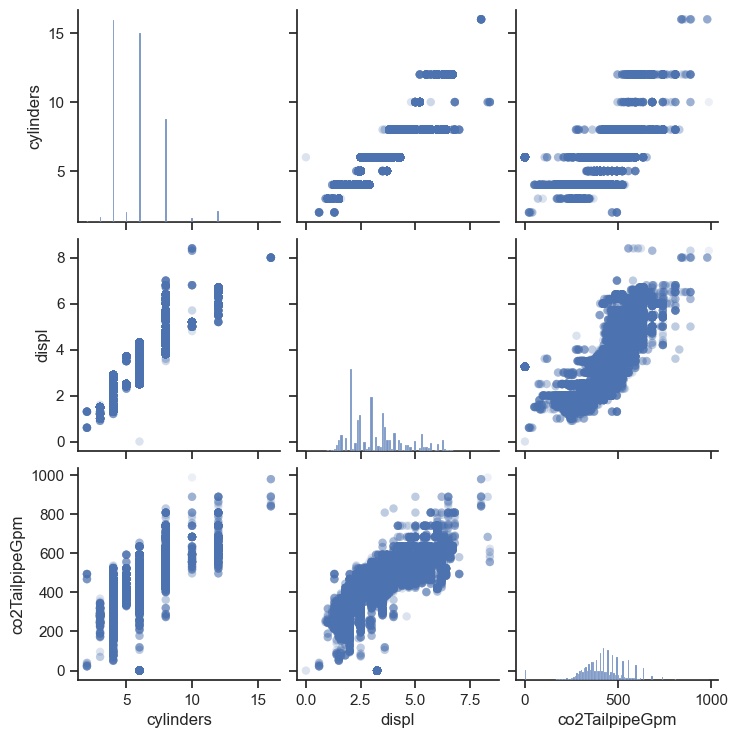

In [25]:
# Create a matrix scatterplot 
sns.pairplot(new_data, plot_kws = dict(alpha=.1, edgecolor = 'none')) 

# Exploratory Data Analysis

**Treating Outliers**

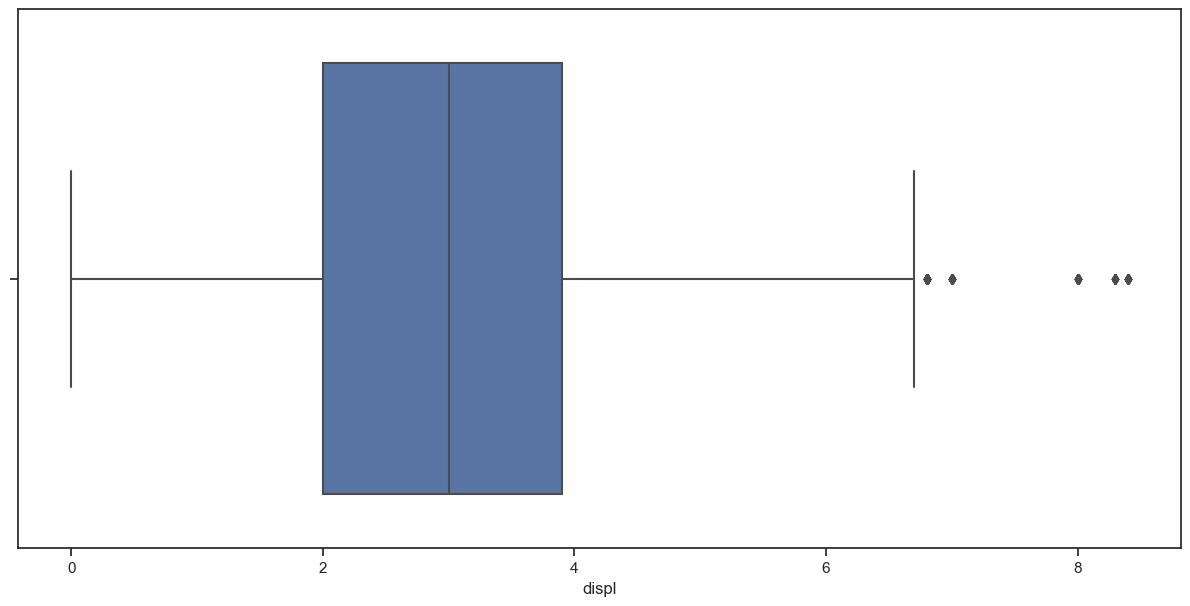

In [26]:
#creating boxplot to get more details on outliers
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['displ'])

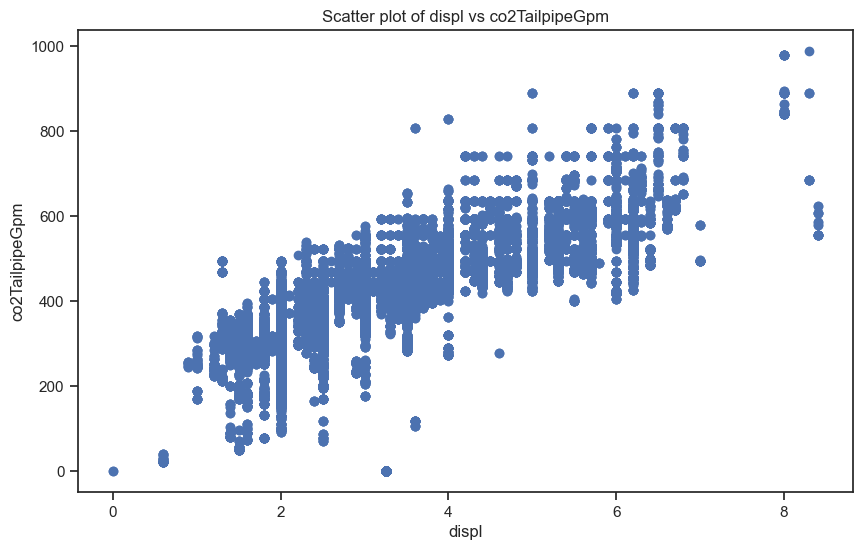

In [27]:
#using scatter plot (crossplot) to visualize better
plt.figure(figsize=(10, 6))
plt.scatter(x=new_data['displ'], y=new_data['co2TailpipeGpm'])
plt.title('Scatter plot of displ vs co2TailpipeGpm')
plt.xlabel('displ')
plt.ylabel('co2TailpipeGpm')
plt.show()


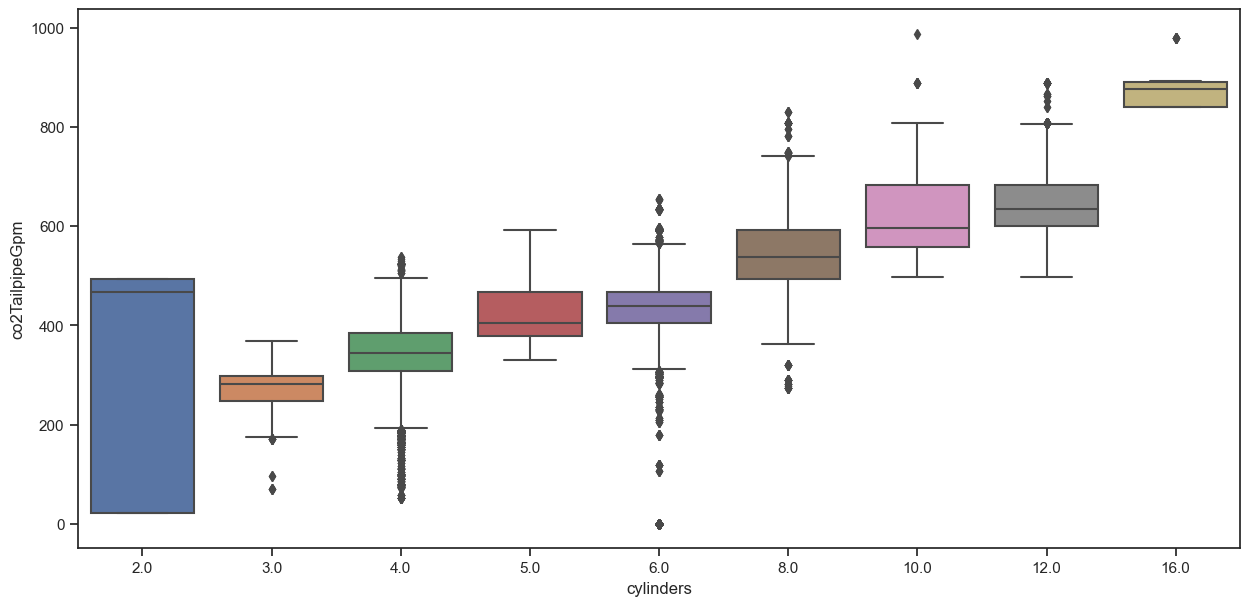

In [28]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['cylinders'], y =new_data['co2TailpipeGpm'])

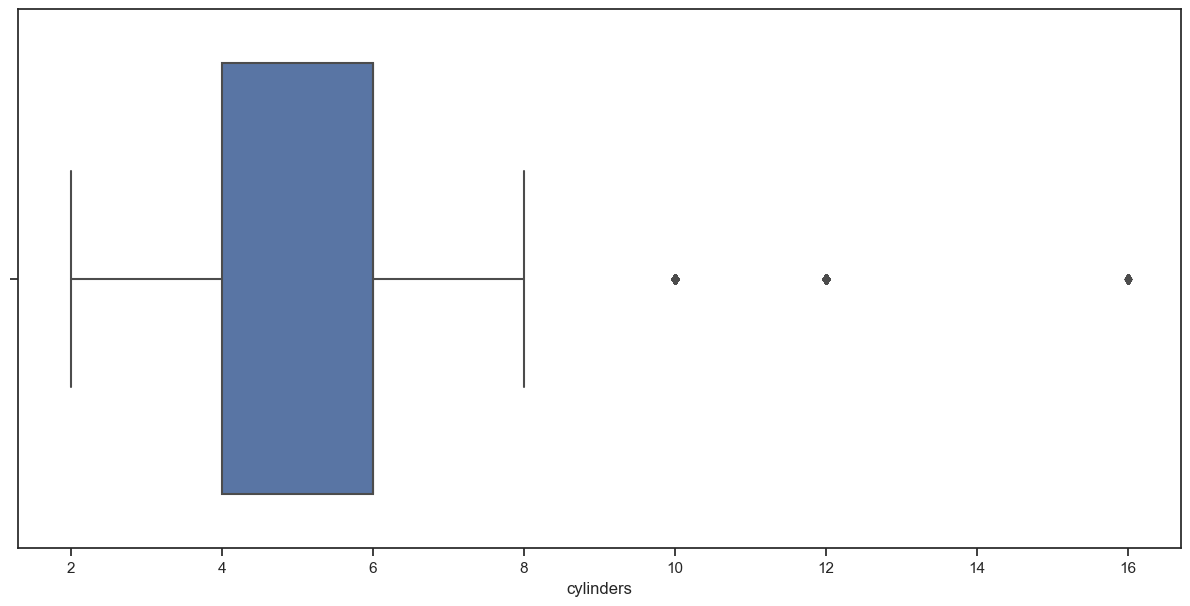

In [29]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =new_data['cylinders'])

In [30]:
#Removal of outliers
new_data_clean = new_data [(new_data['cylinders']< 12.5) & 
                           (new_data['displ'] < 7.5)].copy()

In [31]:
new_data_clean.describe()

cylinders         displ  co2TailpipeGpm
count  47325.000000  47325.000000    47325.000000
mean       5.716366      3.243353      419.109174
std        1.796169      1.292170      120.965660
min        2.000000      0.000000        0.000000
25%        4.000000      2.000000      350.000000
50%        6.000000      3.000000      422.000000
75%        6.000000      3.900000      493.722222
max       12.000000      7.000000      888.700000

In [32]:
new_data_clean.isnull().sum()

cylinders         0
displ             0
drive             0
fuelType          0
make              0
model             0
trany             0
VClass            0
co2TailpipeGpm    0
dtype: int64

**Categorical and numerical variables**

In [33]:
numerical_features = new_data_clean._get_numeric_data().columns 
categorical_features = new_data_clean.columns.difference(numerical_features)

In [34]:
categorical_features

Index(['VClass', 'drive', 'fuelType', 'make', 'model', 'trany'], dtype='object')

In [35]:
#just checking the classes of vehicles
new_data_clean['VClass'].value_counts()

Midsize Cars                          6744
Compact Cars                          6293
Subcompact Cars                       4459
Large Cars                            3590
Small Sport Utility Vehicle 4WD       3141
Two Seaters                           2753
Sport Utility Vehicle - 4WD           2748
Standard Sport Utility Vehicle 4WD    2436
Sport Utility Vehicle - 2WD           2110
Minicompact Cars                      1943
Small Sport Utility Vehicle 2WD       1848
Small Station Wagons                  1803
Standard Pickup Trucks 4WD            1779
Standard Pickup Trucks 2WD            1678
Standard Sport Utility Vehicle 2WD     862
Small Pickup Trucks 2WD                568
Midsize Station Wagons                 546
Minivan - 2WD                          487
Small Pickup Trucks 4WD                447
Special Purpose Vehicle 2WD            349
Vans, Cargo Type                       319
Vans, Passenger Type                   272
Special Purpose Vehicle 4WD             82
Minivan - 4

**Checking for relationships between the categorical variables and the target variable**

In [36]:
VClass_emission = new_data_clean.groupby('VClass')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
VClass_emission

VClass  co2TailpipeGpm
23                Vans, Passenger Type      647.879073
22                    Vans, Cargo Type      623.805116
13         Special Purpose Vehicle 4WD      558.475610
17          Standard Pickup Trucks 4WD      534.805351
15         Sport Utility Vehicle - 4WD      511.474240
16          Standard Pickup Trucks 2WD      509.962443
8              Small Pickup Trucks 4WD      489.231770
18  Standard Sport Utility Vehicle 2WD      477.769142
21                         Two Seaters      473.074056
14         Sport Utility Vehicle - 2WD      469.964928
6                        Minivan - 4WD      466.386678
19  Standard Sport Utility Vehicle 4WD      462.811576
7              Small Pickup Trucks 2WD      451.658571
5                        Minivan - 2WD      438.590289
12         Special Purpose Vehicle 2WD      433.714434
3               Midsize Station Wagons      424.523543
4                     Minicompact Cars      417.879551
1                           Large Cars      415.924179
20                     Subcompact Cars      397.580738
10     Small Sport Utility Vehicle 4WD      377.397007
2                         Midsize Cars      365.911313
0                         Compact Cars      359.686640
9      Small Sport Utility Vehicle 2WD      353.202922
11                Small Station Wagons      341.912419

Text(0.5, 1.0, 'Emission by Vehicle Class')

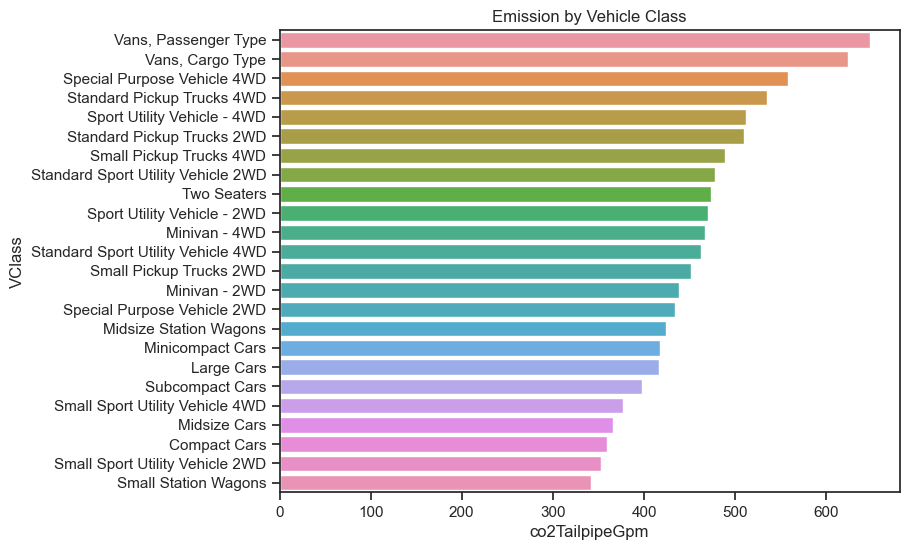

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(y = VClass_emission['VClass'], x = VClass_emission['co2TailpipeGpm'], orient = 'h')

plt.xlabel('co2TailpipeGpm')
plt.ylabel("VClass")
plt.title("Emission by Vehicle Class")

From the graph, we can see the classes of vehicles that emits the most CO2 and the classes that emits the least.

In [38]:
Wd_emission = new_data_clean.groupby('drive')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Wd_emission

drive  co2TailpipeGpm
1  4-Wheel or All-Wheel Drive      520.125851
4     Part-time 4-Wheel Drive      496.192874
5            Rear-Wheel Drive      471.505874
0               4-Wheel Drive      469.467947
2             All-Wheel Drive      395.165884
3           Front-Wheel Drive      342.684067

Text(0.5, 1.0, 'Emission by Drive Type')

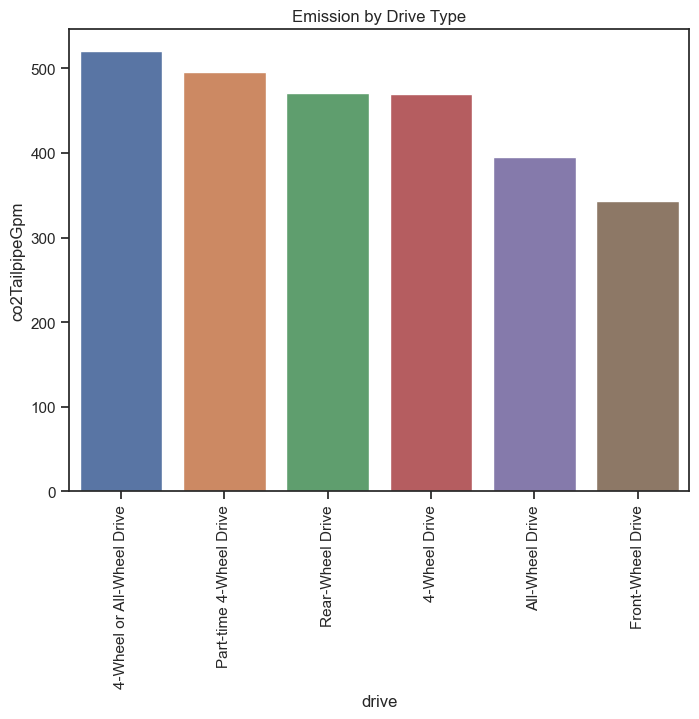

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x = Wd_emission['drive'], y = Wd_emission['co2TailpipeGpm'])

plt.xlabel('drive')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Emission by Drive Type")

In [40]:
#Emission by Fuel_Type
Emission_by_Fuel = new_data_clean.groupby('fuelType')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Emission_by_Fuel

fuelType  co2TailpipeGpm
4       Gasoline or natural gas      572.114583
3               Gasoline or E85      509.294253
5                      Midgrade      506.886556
9                Premium or E85      457.098420
6                       Premium      448.428750
10                      Regular      407.518945
1                        Diesel      386.597164
0                           CNG      377.678983
8       Premium and Electricity      212.460526
7    Premium Gas or Electricity      162.914530
11  Regular Gas and Electricity      117.245509
12   Regular Gas or Electricity       51.000000
2                   Electricity        0.000000

Text(0.5, 1.0, 'Emission by fuelType')

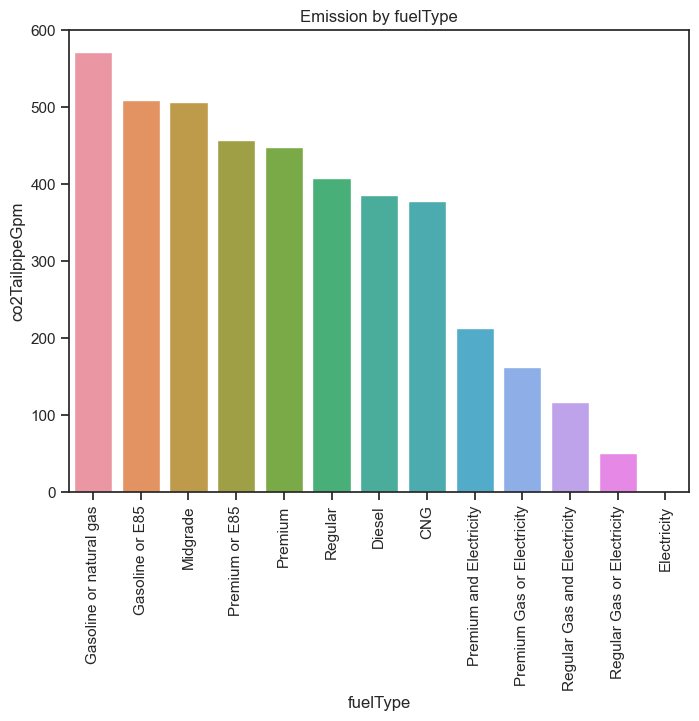

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x = Emission_by_Fuel['fuelType'], y = Emission_by_Fuel['co2TailpipeGpm'])

plt.xlabel('fuelType')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Emission by fuelType")

It can be seen that the electric cars have 0 co2 emission, this is practically reasonable. And we can see that the alternative fuels in dual vehicles emits the least amounts of C02 than the conventional fuels in both single and dual vehicles.

In [42]:
Emission_by_make = new_data_clean.groupby('make')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Top_10 = Emission_by_make.head(10)
Top_10

make  co2TailpipeGpm
41             Maybach      732.634317
32         Lamborghini      689.455324
67         Tecstar, LP      683.615385
50              Pagani      683.000000
58   Roush Performance      644.983827
60  Saleen Performance      644.551648
57         Rolls-Royce      624.124476
16             Ferrari      620.375873
8              Bentley      616.017858
23              Hummer      595.315064

In [43]:
Emission_by_make[Emission_by_make['co2TailpipeGpm']== 0]
#These are electric cars

make  co2TailpipeGpm
56           Rivian             0.0
68            Tesla             0.0
29            Kandi             0.0
10  CODA Automotive             0.0
7               BYD             0.0
4    Azure Dynamics             0.0
37            Lucid             0.0

Text(0.5, 1.0, 'Top 10 car makes with the most Emission')

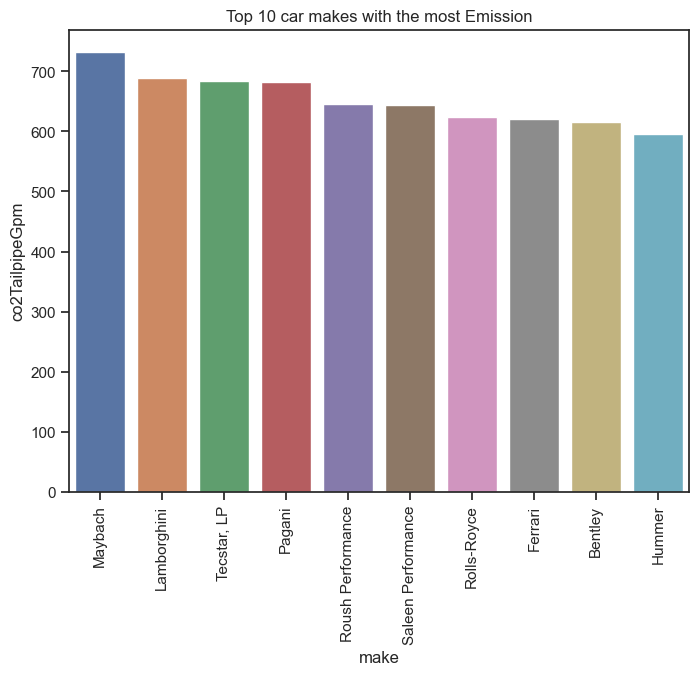

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x = Top_10['make'], y = Top_10['co2TailpipeGpm'])

plt.xlabel('make')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Top 10 car makes with the most Emission")

In [45]:
least_emission = Emission_by_make.tail(10)
least_emission

make  co2TailpipeGpm
73            smart      147.178679
30            Karma       96.750000
51         Polestar       20.666667
56           Rivian        0.000000
68            Tesla        0.000000
29            Kandi        0.000000
10  CODA Automotive        0.000000
7               BYD        0.000000
4    Azure Dynamics        0.000000
37            Lucid        0.000000

Text(0.5, 1.0, 'Top 10 car makes with the least Emission')

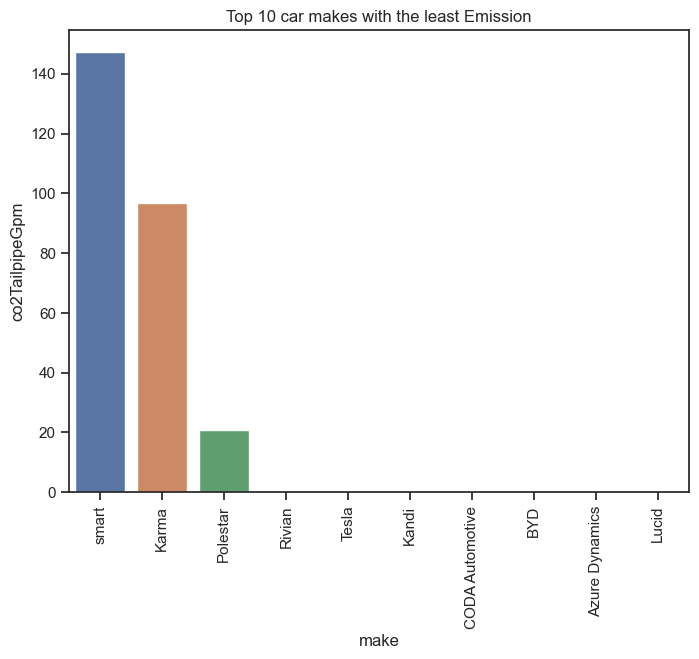

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x = least_emission['make'], y = least_emission['co2TailpipeGpm'])

plt.xlabel('make')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Top 10 car makes with the least Emission")

In [47]:
Emission_by_model = new_data_clean.groupby('model')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Top_10_models = Emission_by_model.head(10)
Top_10_models

model  co2TailpipeGpm
571                Aventador Sian Coupe      864.000000
572             Aventador Sian Roadster      864.000000
1690               L-147/148 Murcielago      848.304545
2022                Murcielago Roadster      848.304545
1688                 L-140/141 Gallardo      848.304545
2019                         Murcielago      848.304545
1408  G550 4x4 (Special Off-Road Model)      829.000000
1407                           G550 4x4      829.000000
524                           Arnage RL      807.909091
198                     575 M Maranello      807.909091

Text(0.5, 1.0, 'Top 10 car models with the most Emission')

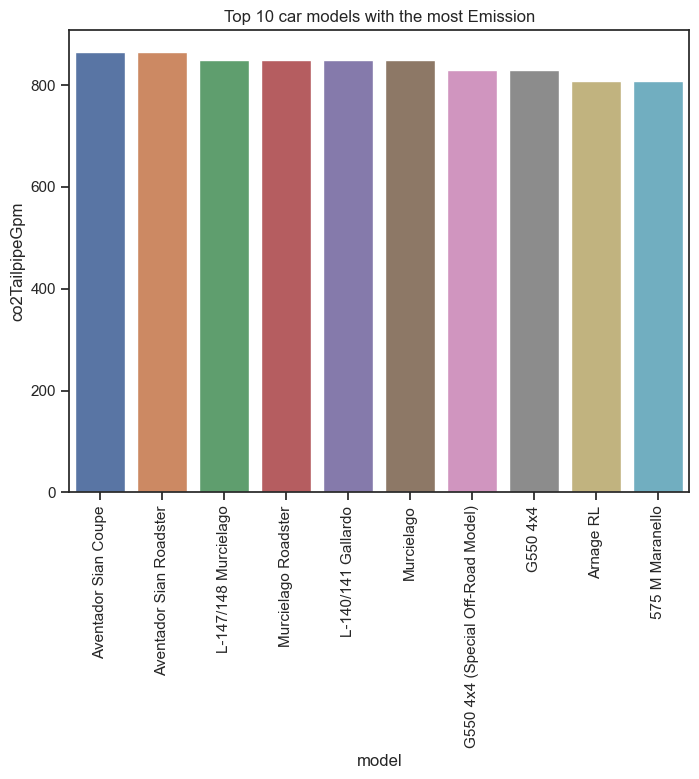

In [48]:
plt.figure(figsize=(8,6))
sns.barplot(x = Top_10_models['model'], y = Top_10_models['co2TailpipeGpm'])

plt.xlabel('model')
plt.ylabel("co2TailpipeGpm")
plt.xticks(rotation=90)
plt.title("Top 10 car models with the most Emission")

In [49]:
Emission_by_trany = new_data_clean.groupby('trany')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Top_10_trany = Emission_by_trany.head(10)  
Top_10_trany

trany  co2TailpipeGpm
24  Automatic 10-spd      508.191638
26   Automatic 5-spd      507.797259
25   Automatic 4-spd      488.747597
9    Automatic (AM7)      480.605340
27   Automatic 6-spd      473.861478
28   Automatic 7-spd      469.931041
20    Automatic (S7)      468.338548
29   Automatic 8-spd      466.063694
18    Automatic (S5)      459.209014
16   Automatic (S10)      446.834225

Text(0.5, 1.0, 'Top 10 Emission by trany')

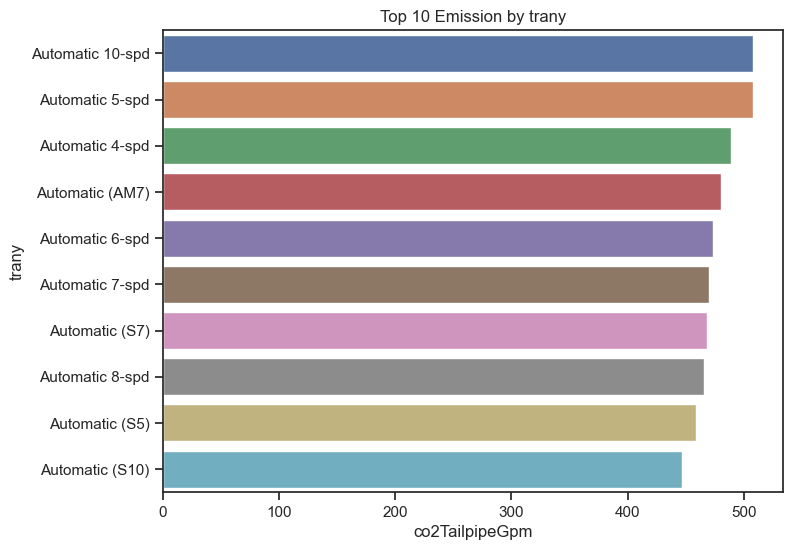

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(y = Top_10_trany['trany'], x = Top_10_trany['co2TailpipeGpm'], orient = 'h')

plt.xlabel('co2TailpipeGpm')
plt.ylabel("trany")
plt.title("Top 10 Emission by trany")

In [51]:
Emission_by_trany = new_data_clean.groupby('trany')['co2TailpipeGpm'].mean().reset_index().sort_values(by= 'co2TailpipeGpm', ascending = False)
Least_10_trany = Emission_by_trany.tail(10)  
Least_10_trany

trany  co2TailpipeGpm
14                 Automatic (AV-S7)      305.571447
13                 Automatic (AV-S6)      302.241884
3                  Automatic (AM-S6)      296.126470
23  Automatic (variable gear ratios)      292.559970
12                Automatic (AV-S10)      287.279070
11                 Automatic (AV-S1)      262.333333
2                 Automatic (AM-S10)      258.500000
7                    Automatic (AM5)      245.492063
0                     Automatic (A1)        4.267303
1                     Automatic (A2)        0.000000

Text(0.5, 1.0, 'Least 10 Emission by trany')

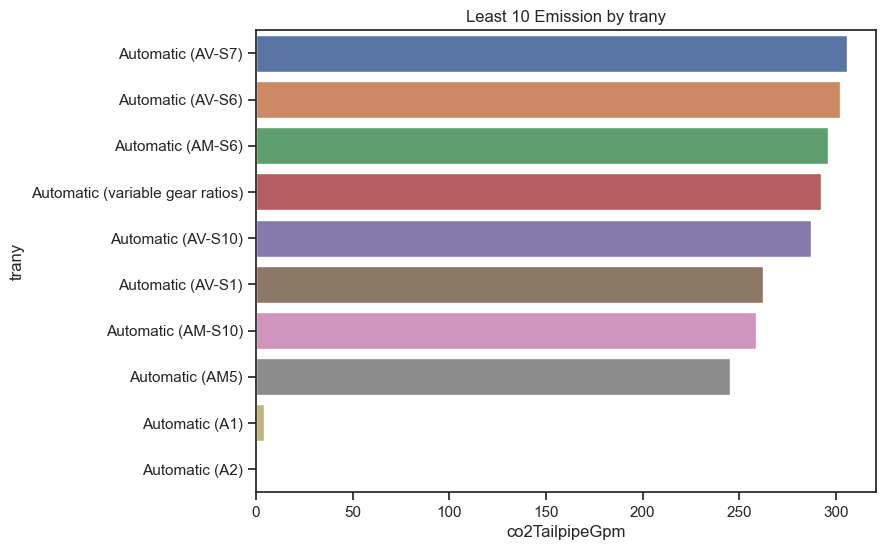

In [52]:
plt.figure(figsize=(8,6))
sns.barplot(y = Least_10_trany['trany'], x = Least_10_trany['co2TailpipeGpm'], orient = 'h')

plt.xlabel('co2TailpipeGpm')
plt.ylabel("trany")
plt.title("Least 10 Emission by trany")

**Separating Input and Target variables, then, Numerical and Categorical Variables from Input variables**

In [53]:
Y = new_data_clean["co2TailpipeGpm"]
X = new_data_clean.drop(columns='co2TailpipeGpm')

In [54]:
numerical_features = X._get_numeric_data().columns 
categorical_features = X.columns.difference(numerical_features)

In [55]:
numerical_features

Index(['cylinders', 'displ'], dtype='object')

In [56]:
# creating tables with numerical and categorical variables
num_features = X[numerical_features]
cat_features = X[categorical_features]

In [57]:
#printing the counts of all categorical input with respect to trany feature
cat_features['trany'].value_counts()

Automatic (S6)                      6656
Automatic (S8)                      5605
Manual 6-spd                        5237
Automatic 4-spd                     4083
Automatic 6-spd                     3340
Manual 5-spd                        3028
Automatic 5-spd                     2615
Automatic (variable gear ratios)    2089
Automatic 8-spd                     1707
Automatic (AM-S7)                   1406
Automatic 7-spd                     1350
Automatic 9-spd                     1295
Automatic (S5)                      1248
Automatic (S10)                      935
Automatic (A1)                       838
Automatic (S7)                       734
Automatic (AM7)                      613
Automatic (AV-S6)                    606
Automatic 10-spd                     574
Automatic (AM-S8)                    480
Automatic (AV-S7)                    468
Automatic (S9)                       401
Automatic (S4)                       384
Automatic (AM-S6)                    366
Manual 7-spd    

**Feature Scaling**


In [58]:
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
    
for col in num_features.columns:
    num_features[col] = ss.fit_transform(num_features[[col]]).squeeze()

**Label Enconding the Categorical Features**

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features = cat_features.astype(str).apply(LabelEncoder().fit_transform)

In [60]:
#printing the counts of all categorical input with respect to trany feature
cat_features['trany'].value_counts()

19    6656
21    5605
32    5237
25    4083
27    3340
31    3028
26    2615
23    2089
29    1707
4     1406
28    1350
30    1295
18    1248
16     935
0      838
20     734
9      613
13     606
24     574
5      480
14     468
22     401
17     384
3      366
33     314
8      313
15     296
12      86
10      84
1       82
11      48
7       28
6       12
2        4
Name: trany, dtype: int64

**Concatenating the Numerical and Categorical Variables**

In [61]:
X = pd.concat([num_features, cat_features], axis = 1)

# Model Development

## Random Forest Regression

In [62]:
# Split the data into training and test samples
from sklearn.model_selection import train_test_split

# Split the data into training and test samples, stratified by Trany
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf =  RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=500)
rf = rf.fit(X_train, Y_train)

In [64]:
# Compute training R2
training_R2 = rf.score(X_train, Y_train)
training_R2

0.8065417881877883

Text(0.5, 1.0, 'Training R2 = 0.81  Test R2 = 0.81')

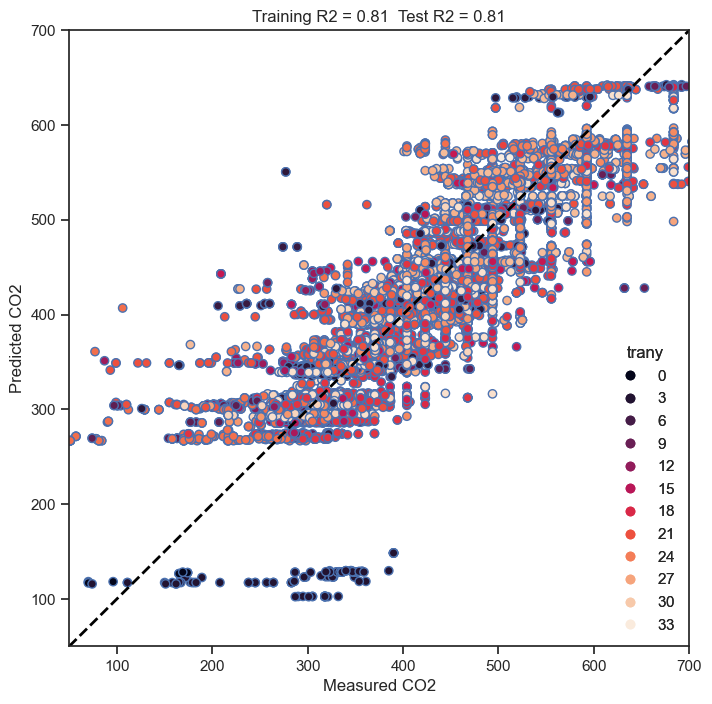

In [65]:
# Making prediction using test data
Y_pred = rf.predict(X_test) 

# Compute test R2
test_R2 = rf.score(X_test, Y_test)   

# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Create a series of plots for predicted CO2 versus actual CO2 
fig = plt.figure(figsize=(8, 8))
plt.axis([50, 700, 50, 700])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['trany'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="trany")
plt.gca().add_artist(legend1)

plt.plot([50, 700],[50, 700], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

I colored the algorithm plots by the most important categorical variable,  'trany' to see possible patterns and relationships between the different trany. I'll be doing same for all the other algorithms.

### Using Cross-Validation for Tuning the Hyperparameter K.

In [66]:
from sklearn.model_selection import GridSearchCV

#params = {'n_estimators': [200, 500], 'max_depth': [5, 10]}
params = {'n_estimators': [200, 500], 'max_depth': [5, 10], 'min_samples_split': [200, 1000], 'min_samples_leaf': [500, 1000], 'max_features': [3, 6]}

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, params, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10], 'max_features': [3, 6],
                         'min_samples_leaf': [500, 1000],
                         'min_samples_split': [200, 1000],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [67]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [68]:
cv_res[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

params  split0_test_score  \
27  {'max_depth': 10, 'max_features': 6, 'min_samp...         -52.464013   
24  {'max_depth': 10, 'max_features': 6, 'min_samp...         -52.569081   
25  {'max_depth': 10, 'max_features': 6, 'min_samp...         -52.590983   
26  {'max_depth': 10, 'max_features': 6, 'min_samp...         -52.551364   
19  {'max_depth': 10, 'max_features': 3, 'min_samp...         -53.164888   
17  {'max_depth': 10, 'max_features': 3, 'min_samp...         -53.082919   
18  {'max_depth': 10, 'max_features': 3, 'min_samp...         -53.349201   
16  {'max_depth': 10, 'max_features': 3, 'min_samp...         -53.298799   
9   {'max_depth': 5, 'max_features': 6, 'min_sampl...         -54.970572   
11  {'max_depth': 5, 'max_features': 6, 'min_sampl...         -54.971486   
8   {'max_depth': 5, 'max_features': 6, 'min_sampl...         -54.998820   
10  {'max_depth': 5, 'max_features': 6, 'min_sampl...         -54.948566   
3   {'max_depth': 5, 'max_features': 3, 'min_sampl...         -55.484928   
1   {'max_depth': 5, 'max_features': 3, 'min_sampl...         -55.412667   
0   {'max_depth': 5, 'max_features': 3, 'min_sampl...         -55.410961   
2   {'max_depth': 5, 'max_features': 3, 'min_sampl...         -55.505922   
30  {'max_depth': 10, 'max_features': 6, 'min_samp...         -63.739403   
31  {'max_depth': 10, 'max_features': 6, 'min_samp...         -63.825645   
29  {'max_depth': 10, 'max_features': 6, 'min_samp...         -63.801473   
28  {'max_depth': 10, 'max_features': 6, 'min_samp...         -63.859482   
15  {'max_depth': 5, 'max_features': 6, 'min_sampl...         -64.080291   
13  {'max_depth': 5, 'max_features': 6, 'min_sampl...         -64.146365   
12  {'max_depth': 5, 'max_features': 6, 'min_sampl...         -64.156385   
14  {'max_depth': 5, 'max_features': 6, 'min_sampl...         -64.103018   
22  {'max_depth': 10, 'max_features': 3, 'min_samp...         -65.048866   
21  {'max_depth': 10, 'max_features': 3, 'min_samp...         -65.078031   
20  {'max_depth': 10, 'max_features': 3, 'min_samp...         -65.168693   
23  {'max_depth': 10, 'max_features': 3, 'min_samp...         -64.975886   
6   {'max_depth': 5, 'max_features': 3, 'min_sampl...         -65.510141   
7   {'max_depth': 5, 'max_features': 3, 'min_sampl...         -65.306049   
5   {'max_depth': 5, 'max_features': 3, 'min_sampl...         -65.479828   
4   {'max_depth': 5, 'max_features': 3, 'min_sampl...         -65.482395   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
27         -55.494238         -53.822050       -53.861988        1.152906   
24         -55.567549         -53.828824       -53.876309        1.151539   
25         -55.494029         -53.864789       -53.913353        1.126157   
26         -55.520915         -53.982050       -53.944589        1.155349   
19         -56.794661         -55.121068       -55.280342        1.351418   
17         -56.728901         -55.311735       -55.353054        1.352454   
18         -56.968803         -55.357080       -55.358540        1.362101   
16         -56.647613         -55.477260       -55.373635        1.317830   
9          -57.840000         -55.858246       -56.172867        1.164106   
11         -57.848906         -56.067272       -56.183219        1.170762   
8          -57.891894         -56.015155       -56.204958        1.189287   
10         -57.865113         -56.019181       -56.237618        1.222835   
3          -58.872304         -57.295214       -57.264613        1.324355   
1          -59.118952         -57.082219       -57.398967        1.394045   
0          -58.658681         -57.321166       -57.410149        1.334257   
2          -59.518374         -57.235599       -57.519046        1.452445   
30         -68.445071         -67.735872       -67.718634        1.751507   
31         -68.424764         -67.695006       -67.721889        1.726928   
29         -68.555922         -67.804390       -67.745873        1.742676  

In [69]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=1000, n_estimators=500)

In [70]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=200)

rmse = -cross_val_score(rf, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using RF Regression with an optimal set of parameters')

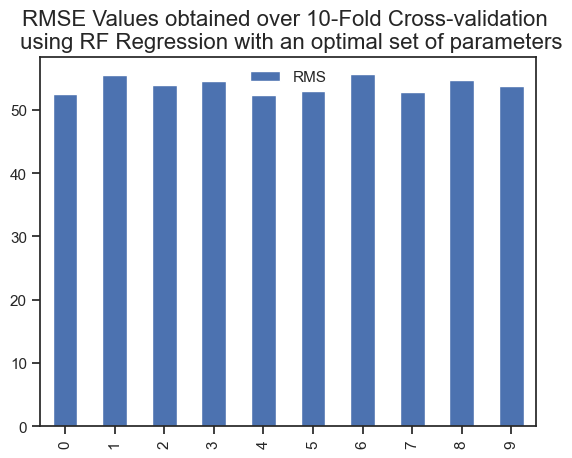

In [71]:
new_data_rf_rmses = pd.DataFrame(rmse, columns = ['RMS'])
new_data_rf_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using RF Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [72]:
rf = RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=500,
                      min_samples_split=200, n_estimators=200)

rf.fit(X_train, Y_train) 

# Compute training R2
training_R2 = rf.score(X_train, Y_train) 

In [73]:
# Make prediction using test data
Y_pred = rf.predict(X_test)  

# Compute test R2
test_R2 = rf.score(X_test, Y_test)       

Text(0.5, 1.0, 'Training R2 = 0.81  Test R2 = 0.81')

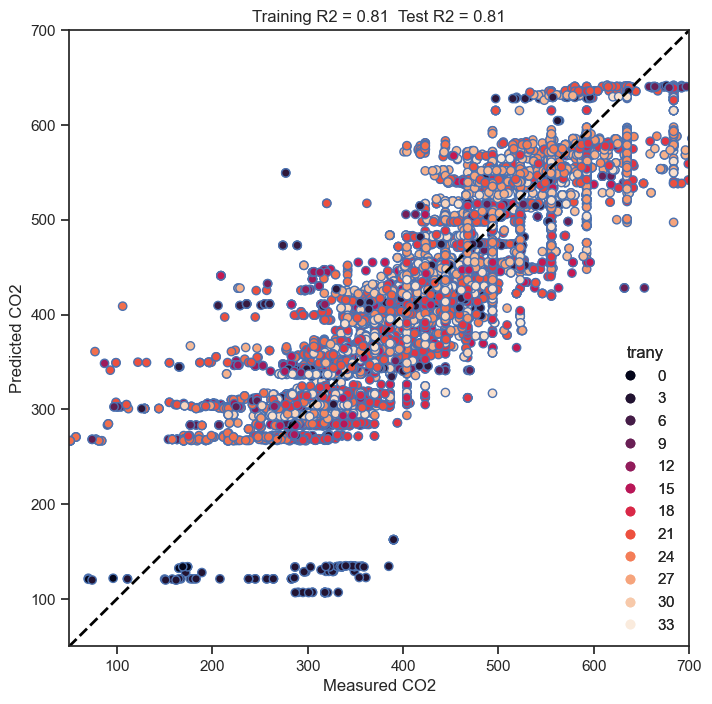

In [74]:
# Calculating MSE 
from sklearn.metrics import mean_squared_error 
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   
# Create a series of plots for predicted CO2 versus actual CO2 
fig = plt.figure(figsize=(8, 8))
plt.axis([50, 700, 50, 700])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['trany'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="trany")
plt.gca().add_artist(legend1)

plt.plot([50, 700],[50, 700], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))


**Feature Importance**

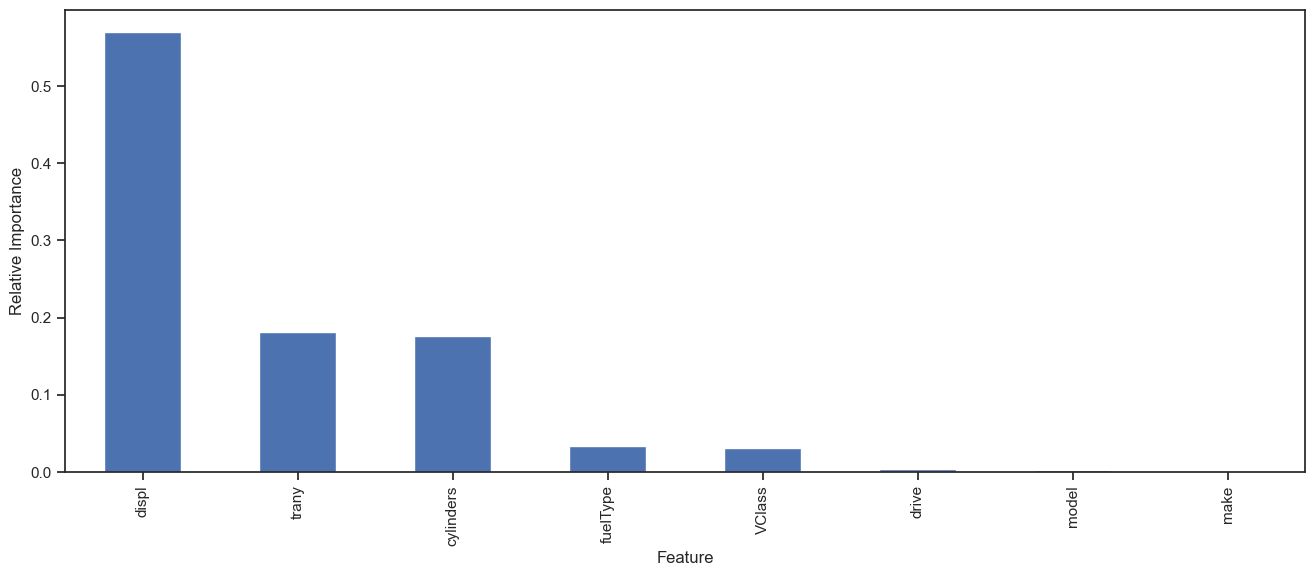

In [75]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');

In [76]:
feature_imp

displ        0.570765
trany        0.181586
cylinders    0.176581
fuelType     0.033227
VClass       0.031201
drive        0.003716
model        0.002059
make         0.000866
dtype: float64

## KNN Regression

In [77]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

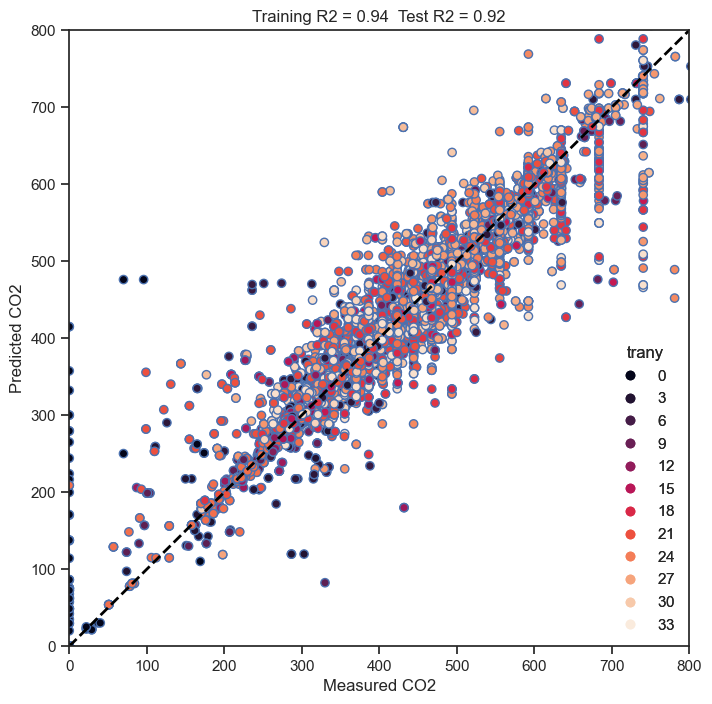

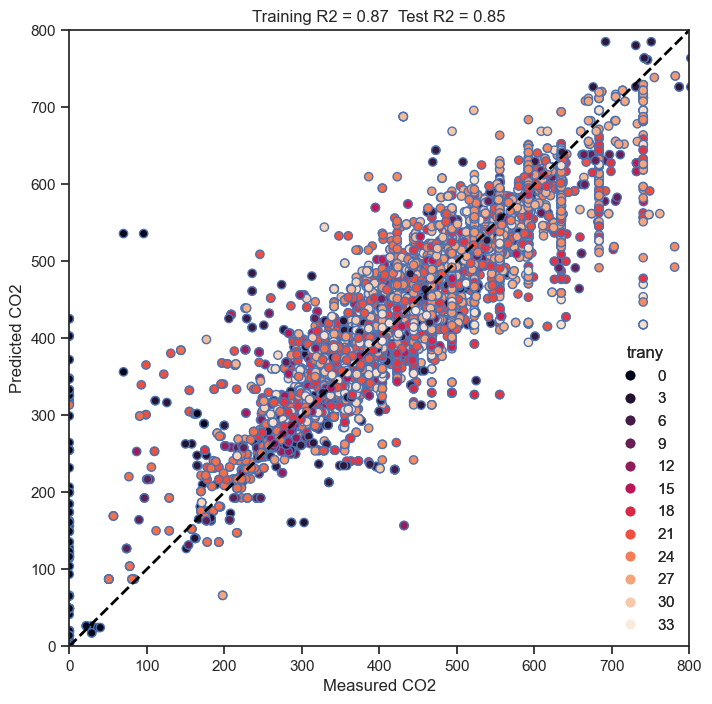

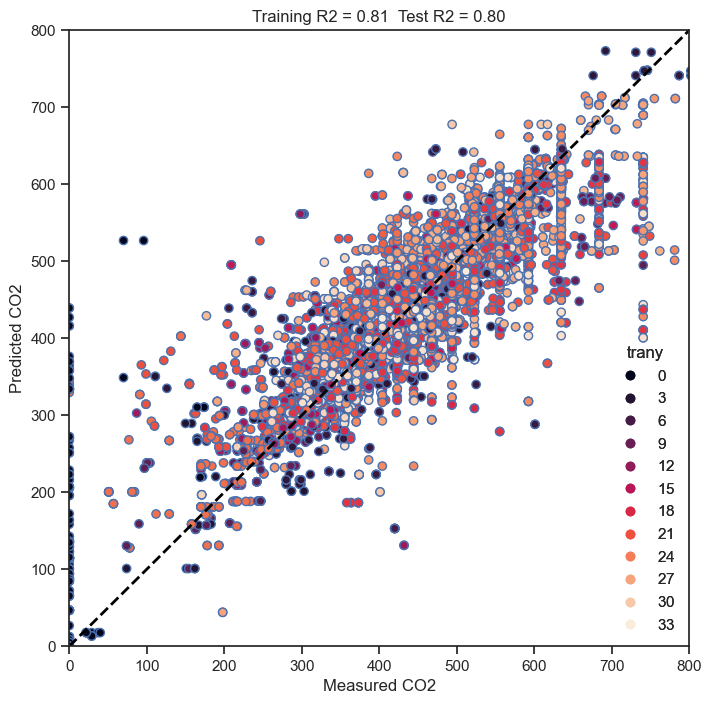

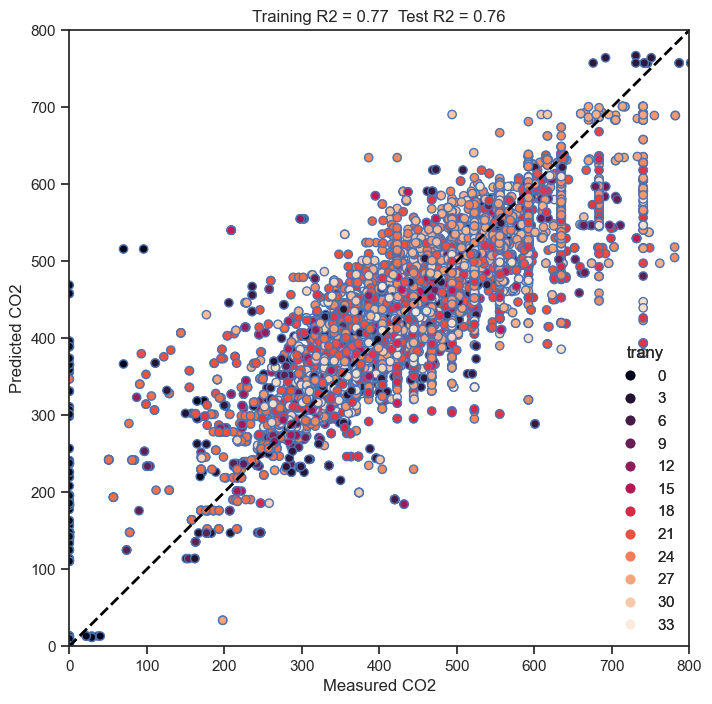

In [78]:
# To store MSE values for different k
MSE = [] 

# To store values of K
k   = []   

 # To store R2
R2  = []     

for K in range(10, 41, 10):
    k.append(K)
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    # Fit the model to the training dataset
    knn.fit(X_train, Y_train)  
    
    # Compute training R2
    training_R2 = knn.score(X_train, Y_train) 
    
    # Make prediction using test data
    Y_pred = knn.predict(X_test)  
    
    # Compute test R2
    test_R2 = knn.score(X_test, Y_test)       
    R2.append(test_R2)
    
    # Calculate MSE
    error = mean_squared_error(Y_test, Y_pred)
    
    # Store MSE values for different K
    MSE.append(error)                          
    residual = (Y_test - Y_pred)  
   
    ## Also create a series of plots for predicted CO2 versus actual CO2 
    fig = plt.figure(figsize=(8, 8))
    plt.axis([0, 800, 0, 800])
    scatter = plt.scatter(Y_test, Y_pred, c=X_test['trany'], edgecolor = 'b')
   

    # Add a legend
    legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="trany")
    plt.gca().add_artist(legend1)

    
    plt.plot([0, 800],[0, 800], color='black', linewidth=2, linestyle='--')


    plt.ylabel('Predicted CO2') 
    plt.xlabel('Measured CO2') 
    plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

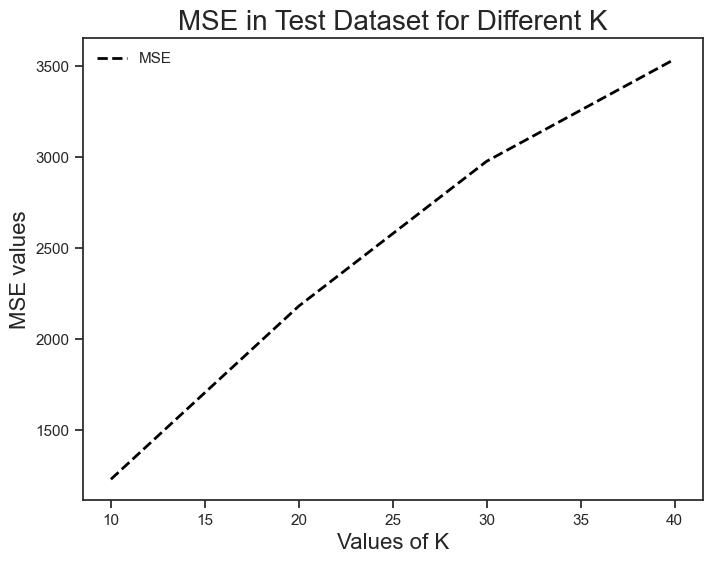

In [79]:
#plotting the mse values against k values
fig = plt.figure(K, figsize=(8, 6))
plt.plot(k, MSE, label = 'MSE', color='black', linewidth=2, linestyle='--')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('MSE values', fontsize = 16)
plt.title ('MSE in Test Dataset for Different K', fontsize = 20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.legend()

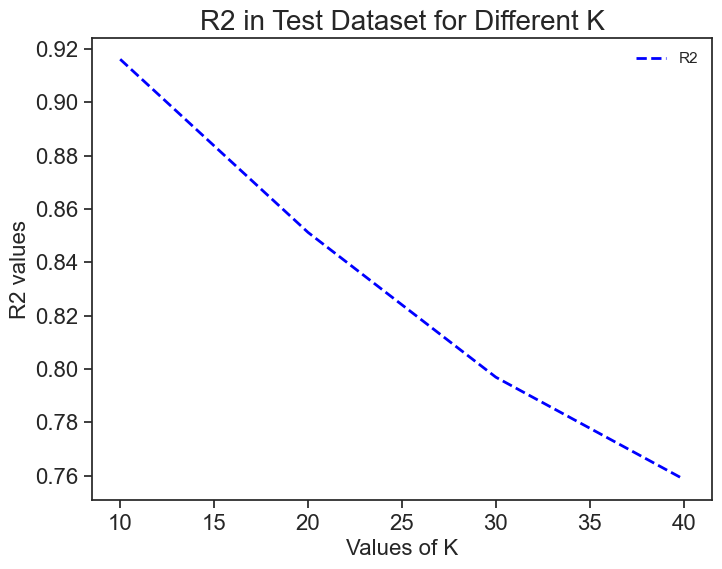

In [80]:
#plotting the r2 values against k values
fig = plt.figure(K, figsize=(8, 6))
plt.plot(k, R2, label = 'R2', color='blue', linewidth=2, linestyle='--')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('R2 values', fontsize = 16)
plt.title ('R2 in Test Dataset for Different K', fontsize = 20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.legend()

### Using Cross-Validation for Tuning the Hyperparameter K.

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(10, 41, 10)}

knn = neighbors.KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(10, 41, 10)},
             scoring='neg_root_mean_squared_error')

In [82]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [83]:
cv_res[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

params  split0_test_score  split1_test_score  \
0  {'n_neighbors': 10}         -33.861588         -37.885214   
1  {'n_neighbors': 20}         -45.718331         -49.600190   
2  {'n_neighbors': 30}         -52.885186         -57.353549   
3  {'n_neighbors': 40}         -57.435869         -62.637485   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
0         -38.206480       -36.827294        1.505198                1  
1         -50.342222       -48.971429        1.558326                2  
2         -58.754587       -56.809923        1.786176                3  
3         -63.878313       -61.941508        1.986722                4

In [84]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=10)

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)

rmse = -cross_val_score(knn, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using KNN Regression with an optimal set of parameters')

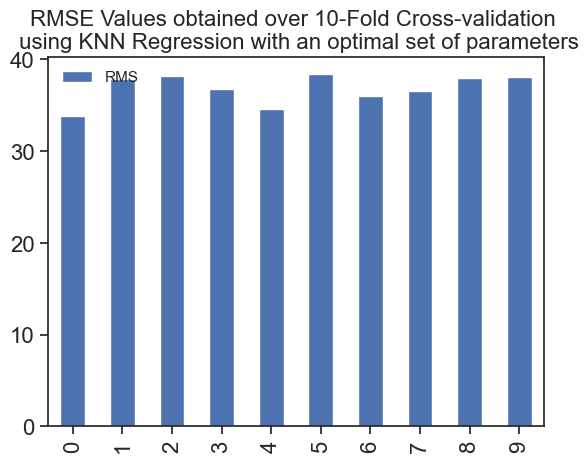

In [86]:
new_data_rf_rmses = pd.DataFrame(rmse, columns = ['RMS'])
new_data_rf_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using KNN Regression with an optimal set of parameters', fontsize = 16)


### Apply Best Hyperparameter to the Test Data

In [87]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train, Y_train) 

# Compute training R2
training_R2 = knn.score(X_train, Y_train) 
training_R2

0.9382454775406878

In [88]:
# Make prediction using test data
Y_pred = knn.predict(X_test)  

# Compute test R2
test_R2 = knn.score(X_test, Y_test) 

Text(0.5, 1.0, 'Training R2 = 0.94  Test R2 = 0.92')

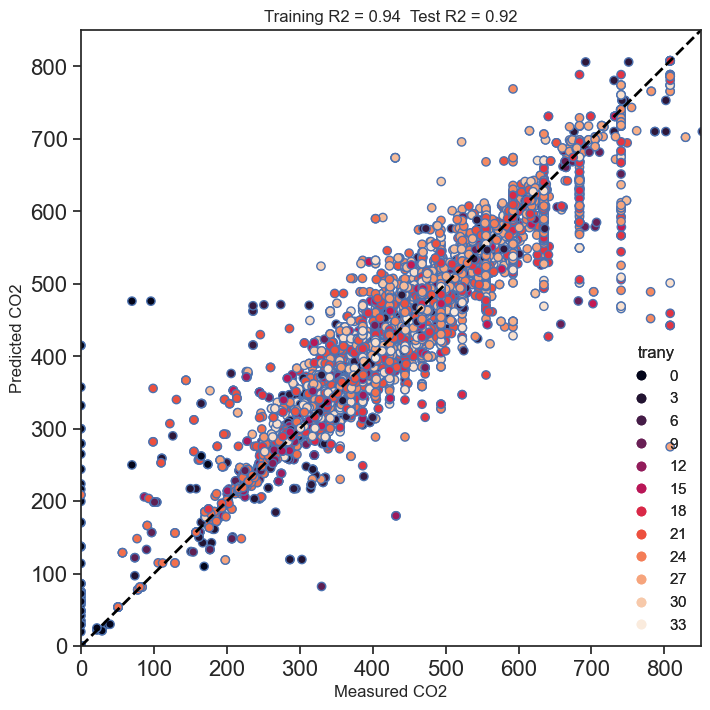

In [89]:
# Create a series of plots for predicted CO2 versus actual CO2 

fig = plt.figure(figsize=(8, 8))
plt.axis([0, 850, 0, 850])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['trany'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="trany")
plt.gca().add_artist(legend1)

plt.plot([0, 850],[0, 850], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## Decision Tree Regression

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 

dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

# Fit the model to the training dataset
dt.fit(X_train, Y_train)  

# Compute training R2
training_R2 = dt.score(X_train, Y_train) 

In [91]:
# Make prediction using test data
Y_pred = dt.predict(X_test)  

# Compute test R2
test_R2 = dt.score(X_test, Y_test)       

# Calculate MSE
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   

Text(0.5, 1.0, 'Training R2 = 0.87  Test R2 = 0.86')

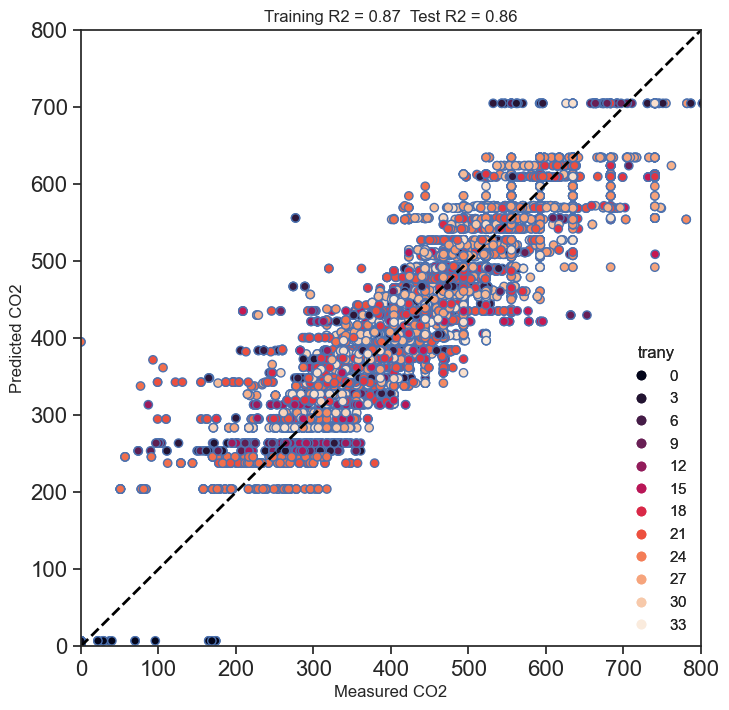

In [92]:
# Create a series of plots for predicted versus actual CO2 
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 800, 0, 800])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['trany'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="trany")
plt.gca().add_artist(legend1)

plt.plot([0, 800],[0, 800], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### Using Cross-Validation for Tuning the Hyperparameter K.

In [93]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [10, 15], 'min_samples_split': [200, 1000], 'min_samples_leaf': [200, 500]}

dt = DecisionTreeRegressor()

grid_search = GridSearchCV(dt, params, cv=10, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [200, 500],
                         'min_samples_split': [200, 1000]},
             scoring='neg_root_mean_squared_error')

In [94]:
cv_reg = pd.DataFrame(grid_search.cv_results_)
cv_reg.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [95]:
cv_reg[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

params  split0_test_score  \
4  {'max_depth': 15, 'min_samples_leaf': 200, 'mi...         -44.256481   
0  {'max_depth': 10, 'min_samples_leaf': 200, 'mi...         -44.420327   
5  {'max_depth': 15, 'min_samples_leaf': 200, 'mi...         -47.742244   
1  {'max_depth': 10, 'min_samples_leaf': 200, 'mi...         -47.742244   
6  {'max_depth': 15, 'min_samples_leaf': 500, 'mi...         -49.009965   
3  {'max_depth': 10, 'min_samples_leaf': 500, 'mi...         -49.009965   
7  {'max_depth': 15, 'min_samples_leaf': 500, 'mi...         -49.009965   
2  {'max_depth': 10, 'min_samples_leaf': 500, 'mi...         -49.009965   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
4         -46.831125         -44.846767       -45.172567        1.146754   
0         -46.964820         -44.994213       -45.321526        1.142136   
5         -49.977201         -48.169892       -48.611232        1.124148   
1         -49.977201         -48.169892       -48.611232        1.124148   
6         -52.070541         -50.168097       -50.392268        1.145882   
3         -52.070541         -50.168097       -50.392268        1.145882   
7         -52.070541         -50.168097       -50.392268        1.145882   
2         -52.070541         -50.168097       -50.392268        1.145882   

   rank_test_score  
4                1  
0                2  
5                3  
1                4  
6                5  
3                6  
7                6  
2                8

In [96]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

In [97]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)
rmse = -cross_val_score(dt, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using DT Regression with an optimal set of parameters')

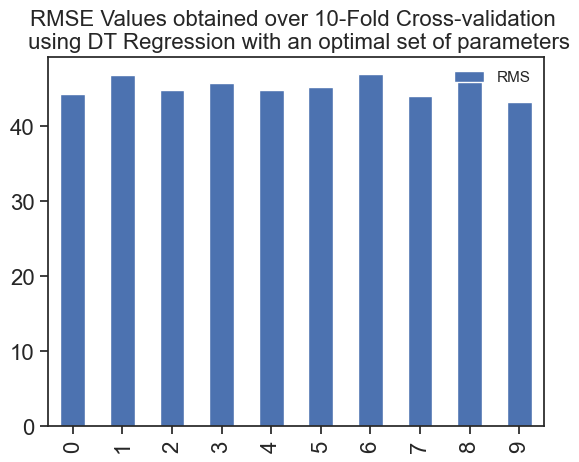

In [98]:
df_dt_rmses = pd.DataFrame(rmse, columns = ['RMS'])
df_dt_rmses.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using DT Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [99]:
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200, min_samples_split=200)

dt.fit(X_train, Y_train) 

# Compute training R2
training_R2 = dt.score(X_train, Y_train) 
training_R2

0.865837563035923

In [100]:
# Make prediction using test data
Y_pred = dt.predict(X_test)  

# Compute test R2
test_R2 = dt.score(X_test, Y_test) 

Text(0.5, 1.0, 'Training R2 = 0.87  Test R2 = 0.86')

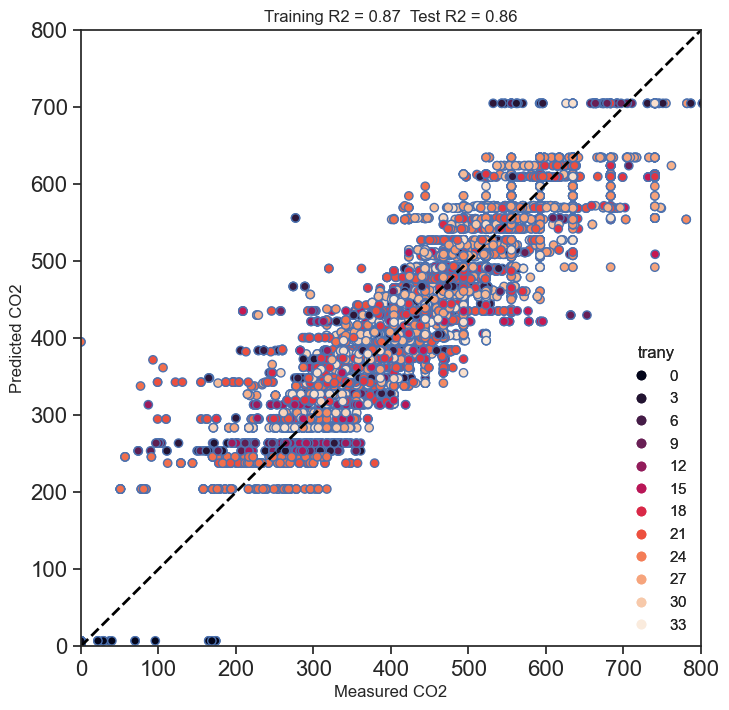

In [101]:
# Create a series of plots for predicted versus actual CO2 
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 800, 0, 800])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['trany'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="trany")
plt.gca().add_artist(legend1)

plt.plot([0, 800],[0, 800], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted CO2') 
plt.xlabel('Measured CO2') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

## ANN Model

In [102]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Create an MLPRegressor object and set the hyperparameters
ann = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.0001, 
                   learning_rate='constant', learning_rate_init=0.001, max_iter=200, random_state=32)

In [103]:
# Fit the model to the training dataset
ann.fit(X_train, Y_train)  

# Compute training R2
training_R2 = ann.score(X_train, Y_train) 

In [104]:
training_R2

0.6278778839709034

In [105]:
# Make prediction using test data
Y_pred = ann.predict(X_test)  

# Compute test R2
test_R2 = ann.score(X_test, Y_test)       

# Calculate MSE
error = mean_squared_error(Y_test, Y_pred) 
residual = (Y_test - Y_pred)  
   

Text(0.5, 1.0, 'Training R2 = 0.63  Test R2 = 0.63')

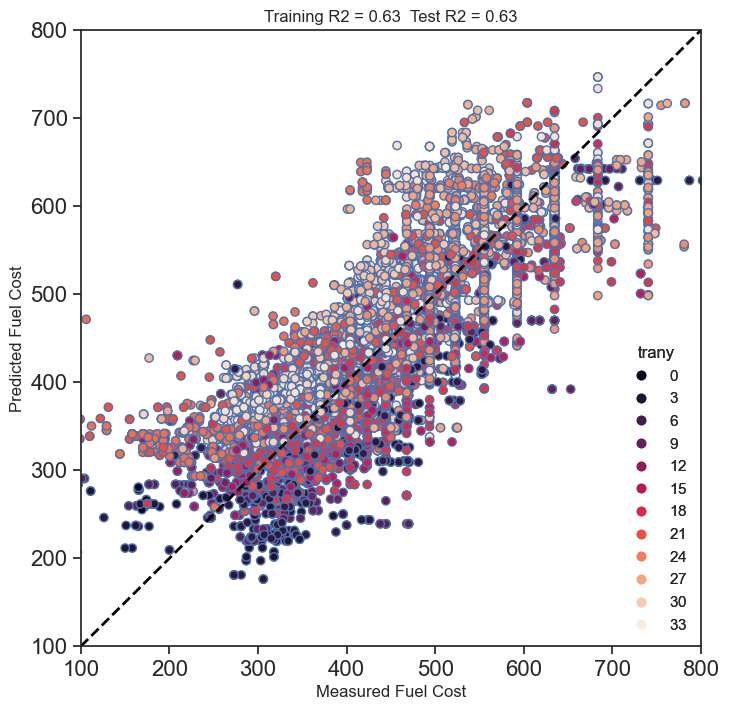

In [106]:
# Create a series of plots for predicted versus actual fuel cost 

fig = plt.figure(figsize=(8, 8))
plt.axis([100, 800, 100, 800])
scatter = plt.scatter(Y_test, Y_pred, c=X_test['trany'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="trany")
plt.gca().add_artist(legend1)

plt.plot([100, 800],[100, 800], color='black', linewidth=2, linestyle='--')


plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

### Using Cross-Validation for Tuning the Hyperparameter K.

In [107]:
from sklearn.model_selection import GridSearchCV

# Create an MLPRegressor object
ann = MLPRegressor(random_state=32)

# Set up the hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(10,10), (50,50), (100,100), (150,150)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.001],
    'max_iter': [50]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(ann, param_grid, cv=5)

# Fit the GridSearchCV object to the training dataset
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=32),
             param_grid={'activation': ['relu'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(10, 10), (50, 50), (100, 100),
                                                (150, 150)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001], 'max_iter': [50],
                         'solver': ['adam']})

In [108]:
cv_reg = pd.DataFrame(grid_search.cv_results_)
cv_reg.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [109]:
cv_reg[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']]

params  split0_test_score  \
3  {'activation': 'relu', 'alpha': 0.0001, 'hidde...           0.729230   
1  {'activation': 'relu', 'alpha': 0.0001, 'hidde...           0.617873   
2  {'activation': 'relu', 'alpha': 0.0001, 'hidde...           0.573827   
0  {'activation': 'relu', 'alpha': 0.0001, 'hidde...           0.589741   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
3           0.591461           0.672519         0.675050        0.047405   
1           0.672878           0.462666         0.623984        0.085837   
2           0.710541           0.601577         0.616294        0.048294   
0           0.594559           0.591823         0.593796        0.006926   

   rank_test_score  
3                1  
1                2  
2                3  
0                4

In [110]:
grid_search.best_estimator_

MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

Text(0.5, 1.0, 'RMSE Values obtained over 10-Fold Cross-validation \n using ANN Regression with an optimal set of parameters')

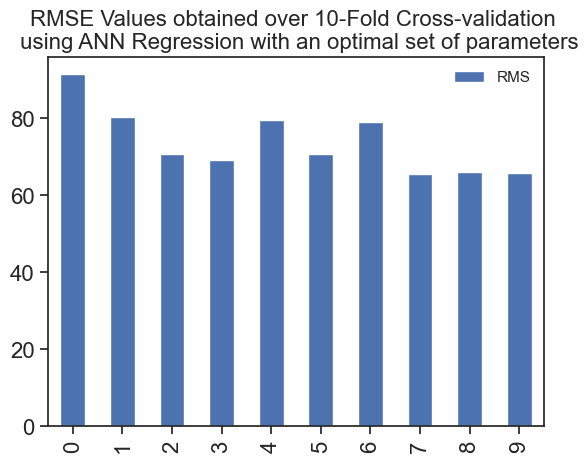

In [111]:
from sklearn.model_selection import cross_val_score

# Create an MLPRegressor object and set the hyperparameters
ann = MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

# Compute cross-validation scores
rmse = -cross_val_score(ann, X_train, Y_train, scoring="neg_root_mean_squared_error", cv=10)

new_data_ann_scores = pd.DataFrame(rmse, columns = ['RMS'])
new_data_ann_scores.plot(kind = 'bar')
plt.title('RMSE Values obtained over 10-Fold Cross-validation \n using ANN Regression with an optimal set of parameters', fontsize = 16)

### Apply Best Hyperparameter to the Test Data

In [112]:
ann = MLPRegressor(hidden_layer_sizes=(150, 150), max_iter=50, random_state=32)

ann.fit(X_train, Y_train) 

# Compute training R2
training_R2 = ann.score(X_train, Y_train) 

In [113]:
# Make prediction using test data
Y_pred = ann.predict(X_test)  

# Compute test R2
test_R2 = ann.score(X_test, Y_test)    


Text(0.5, 1.0, 'Training R2 = 0.56  Test R2 = 0.55')

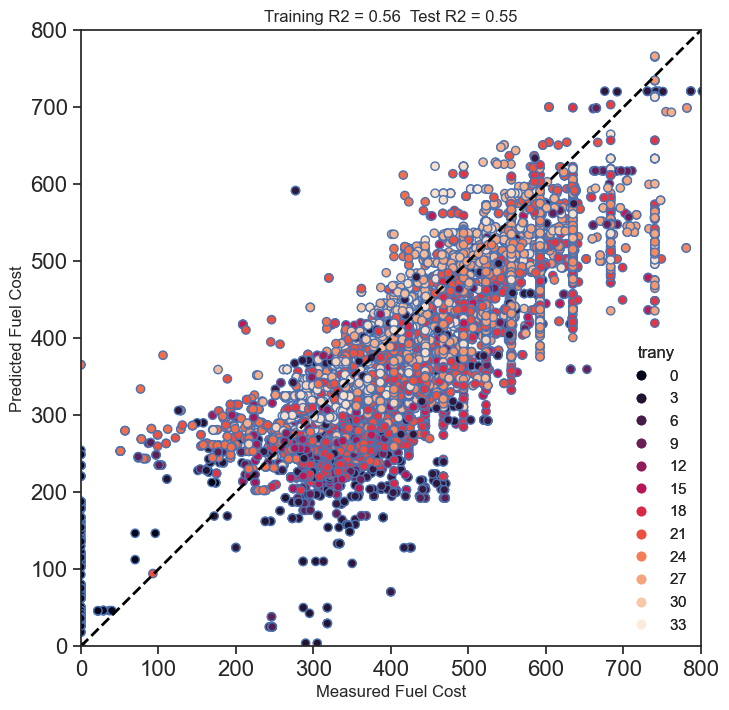

In [114]:
# Create a series of plots for predicted versus actual fuel cost
fig = plt.figure(figsize=(8, 8))
plt.axis([0, 800, 0, 800])
plt.scatter(Y_test, Y_pred, c=X_test['trany'], edgecolor = 'b')

# Add a legend
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="trany")
plt.gca().add_artist(legend1)

plt.plot([0, 800],[0, 800], color='black', linewidth=2, linestyle='--')
plt.ylabel('Predicted Fuel Cost') 
plt.xlabel('Measured Fuel Cost') 
plt.title('Training R2 = %.2f  Test R2 = %.2f'%(training_R2, test_R2))

#### Comments

The models above performed well with KNN performing the best and ANN performing the least after cross validation. 

The RMSE Values obtained over 10-Fold Cross-validation using KNN with an optimal set of parameters seems to have the first fold quite lower than the others and ANN Regression with an optimal set of parameters seems to not look good. 
I would consider startifying by the categorical variable with the highest feature importance and see if get something different and better. ( I would be doing the stratification in a different note book)